In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.shape

(333, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [7]:
X = df.iloc[:, :-1].values
Y = df.iloc[:,-1].values

<Axes: >

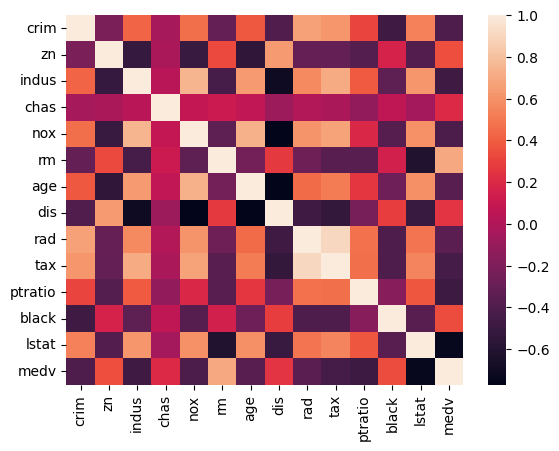

In [8]:
import seaborn as sns

sns.heatmap(df.iloc[:,1:].corr())

<Axes: xlabel='medv', ylabel='lstat'>

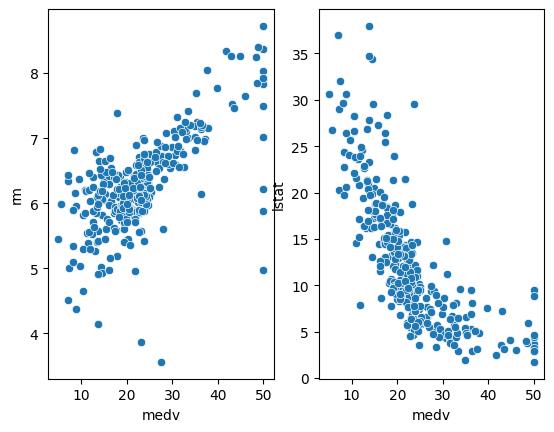

In [9]:
#look for darkest and lighest rm and corr
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='medv', y='rm')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='medv', y='lstat')

<Axes: xlabel='lstat'>

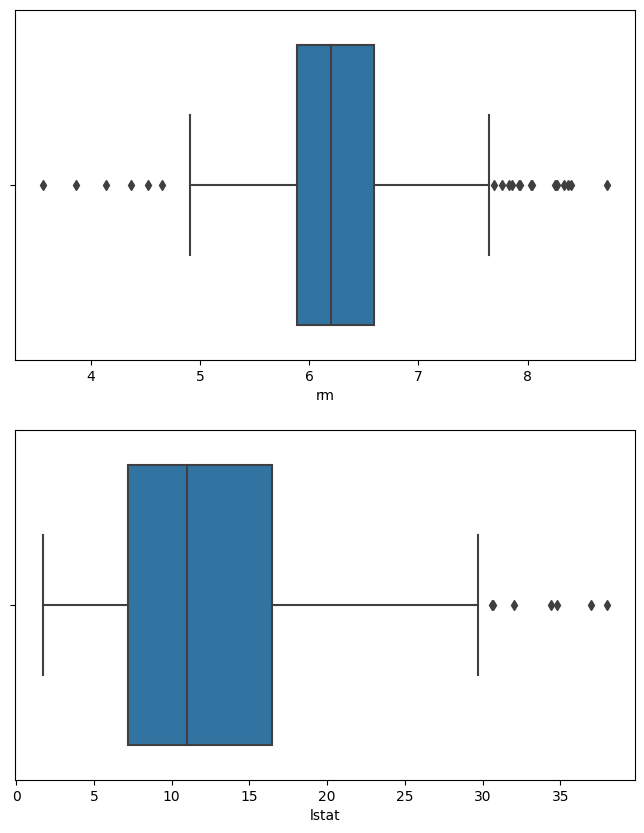

In [10]:
plt.figure(1, (8,10))
plt.subplot(2,1,1)
sns.boxplot(data=df, x='rm')
plt.subplot(2,1,2)
sns.boxplot(data=df, x='lstat')

In [28]:
#outliers
Q1, Q3 = np.percentile(df['rm'], [25,75])
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR #values above this are outliers
print(upper_limit)
lower_limit = Q1 - 1.5*IQR #values below

7.661499999999998


In [12]:
outliers = [outlier for outlier in df['rm'] if outlier>upper_limit or outlier<lower_limit]
print("outliers:", outliers)

outliers: [8.375, 7.929, 7.765, 7.831, 7.853, 8.034, 8.266, 8.725, 8.04, 8.337, 8.247, 8.259, 8.398, 7.691, 7.923, 3.561, 3.863, 4.138, 4.368, 4.652, 4.519]


In [13]:
df['rm'] = np.where(df['rm'] > upper_limit, upper_limit, np.where(df['rm'] < lower_limit, lower_limit, df['rm']))

<Axes: xlabel='rm'>

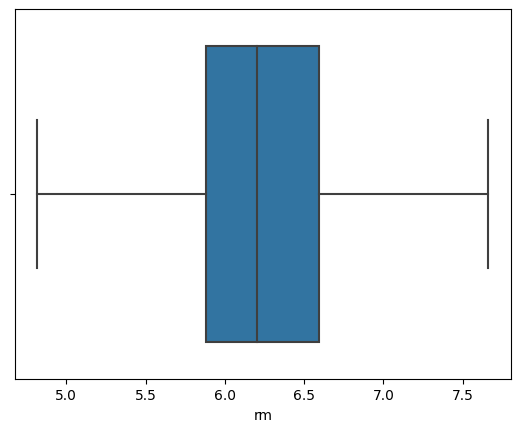

In [14]:
sns.boxplot(data=df, x='rm')

In [15]:
#outliers
Q1, Q3 = np.percentile(df['lstat'], [25,75])
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR #values above this are outliers
lower_limit = Q1 - 1.5*IQR #values below

In [17]:
outliers_rm = [outlier for outlier in df['lstat'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in lstat column are {outliers_rm}")

Outliers in lstat column are [34.41, 34.77, 37.97, 30.63, 31.99, 30.59, 36.98]


In [18]:
df['lstat'] = np.where(df['lstat'] > upper_limit, upper_limit, np.where(df['lstat'] < lower_limit, lower_limit, df['lstat']))

<Axes: xlabel='lstat'>

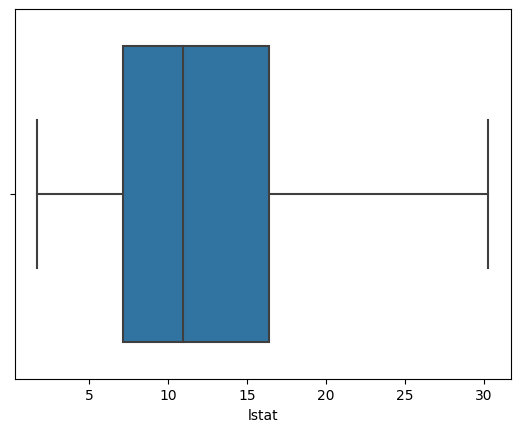

In [19]:
sns.boxplot(data=df, x='lstat')

In [25]:
x = pd.DataFrame([df.rm, df.lstat]).transpose()
y = df['medv']

In [27]:
x.head(10)

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,6.998,2.94
3,7.147,5.33
4,6.012,12.43
5,6.377,20.45
6,6.009,13.27
7,5.889,15.71
8,5.949,8.26
9,6.096,10.26


In [29]:
y.head(10)

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
5    15.0
6    18.9
7    21.7
8    20.4
9    18.2
Name: medv, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [47]:
x_train

,rm,lstat
240,4.8175,7.12
289,6.4590,23.98
139,7.1350,4.45
276,6.1930,21.52
264,5.3490,19.77
...,...,...
8,5.9490,8.26
73,6.4740,12.27
118,5.5720,14.69
189,7.6615,3.16


In [48]:
x_train.shape

(266, 2)

In [49]:
x_test.shape

(67, 2)

In [50]:
y_train.shape

(266,)

In [51]:
y_test.shape

(67,)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr =LinearRegression()

In [54]:
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
prediction = lr.predict(x_test)

In [56]:
prediction

array([23.7061922 ,  3.12357689, 22.02362046, 21.92098725, 22.93322601,
       24.98390157, 14.73569193, 20.0026075 , 32.64243738, 25.91408267,
       34.65667159,  7.20028236, 28.79591744, 18.10865897, 15.87463914,
       29.58077228, 26.9969205 , 20.08332821, 24.24018819, 16.72661785,
       30.23710828, 19.08540807, 24.34186492, 31.80334276, 29.83191402,
       27.73502163, 19.84024856,  2.01311151, 31.65851402, 35.61743283,
       27.84161773, 28.66646179, 36.93097358, 31.87484933, 26.5933758 ,
        8.95990485,  9.85151178, 21.33160928, 27.7686178 , 17.75918822,
       10.49780425, 26.2851732 ,  5.22001051, 26.89304751, 14.55158189,
       23.01911987, 22.97583132, 16.88452583, 31.74388084, 21.84012982,
       28.32962154, 26.69035782, 36.7433249 , 12.29660584, 27.20018621,
       24.37071739, 12.11492096, 20.60209747, 31.88379001, 28.4126652 ,
       20.13264901, 31.40012011, 27.20615001, 27.93182582, 17.05335593,
       26.97300688, 24.14635893])

In [57]:
predictionDec = {"y_test":y_test, "prediction":prediction}

In [58]:
predictionData = pd.DataFrame(predictionDec)
predictionData

,y_test,prediction
53,20.8,23.706192
99,14.6,3.123577
315,21.4,22.023620
299,16.4,21.920987
21,24.7,22.933226
...,...,...
221,20.7,27.206150
197,27.1,27.931826
83,20.5,17.053356
182,25.2,26.973007


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
predictionTrain = lr.predict(x_train)
mse = np.sqrt(mean_squared_error(y_train, predictionTrain))
r2Score = r2_score(y_train, predictionTrain)
print(f"RMSE is {mse} and R2 score is {r2Score}")

RMSE is 5.604072607896432 and R2 score is 0.6337426936336857


In [60]:
predictionTest = lr.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test, predictionTest))
r2Score = r2_score(y_test, predictionTest)
print(f"RMSE is {mse} and R2 score is {r2Score}")

RMSE is 5.141734520495738 and R2 score is 0.6507576964052133
